In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as Layers

In [4]:
(p_tn, q_tn), (p_tt, q_tt) = tf.keras.datasets.mnist.load_data()

def process(dataset):
    return (dataset.astype('float32')/255.)

p_tn = process(p_tn)
p_tt = process(p_tt)

In [5]:
print(p_tn.shape, p_tt.shape)

(60000, 28, 28) (10000, 28, 28)


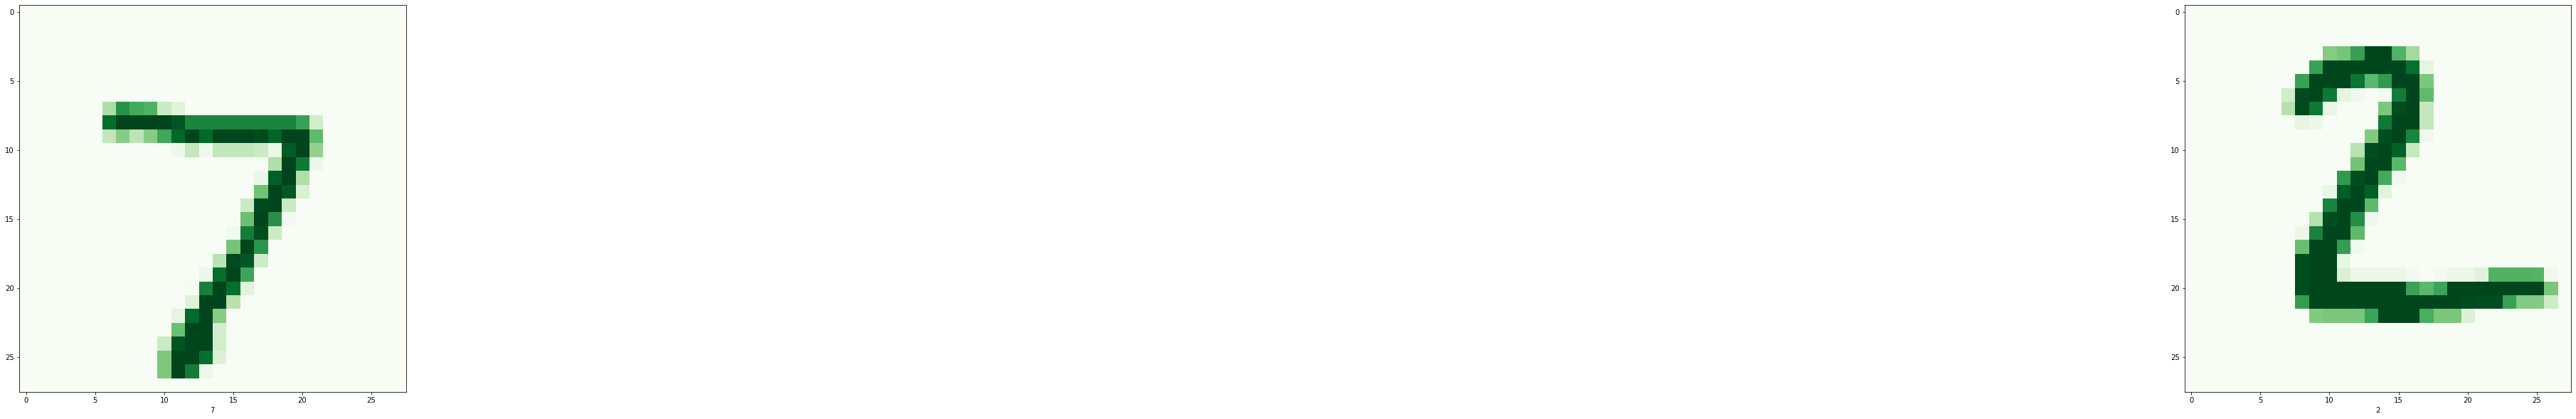

In [19]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1,2,figsize=(100,10))


for k in range(0,2):
    axis[k].imshow(p_tt[k], cmap='Greens')
    
for k, ax in enumerate(axis.flat):
    ax.set(xlabel=q_tt[k])

In [27]:
ml = tf.keras.models.Sequential([
    Layers.LSTM(54, activation="softmax",input_shape=(28,28)),
    Layers.Dense(28, activation="softmax"),
    Layers.Dense(5, activation="softmax")
])

ml.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 54)                17928     
                                                                 
 dense_13 (Dense)            (None, 28)                1540      
                                                                 
 dense_14 (Dense)            (None, 5)                 145       
                                                                 
Total params: 19,613
Trainable params: 19,613
Non-trainable params: 0
_________________________________________________________________


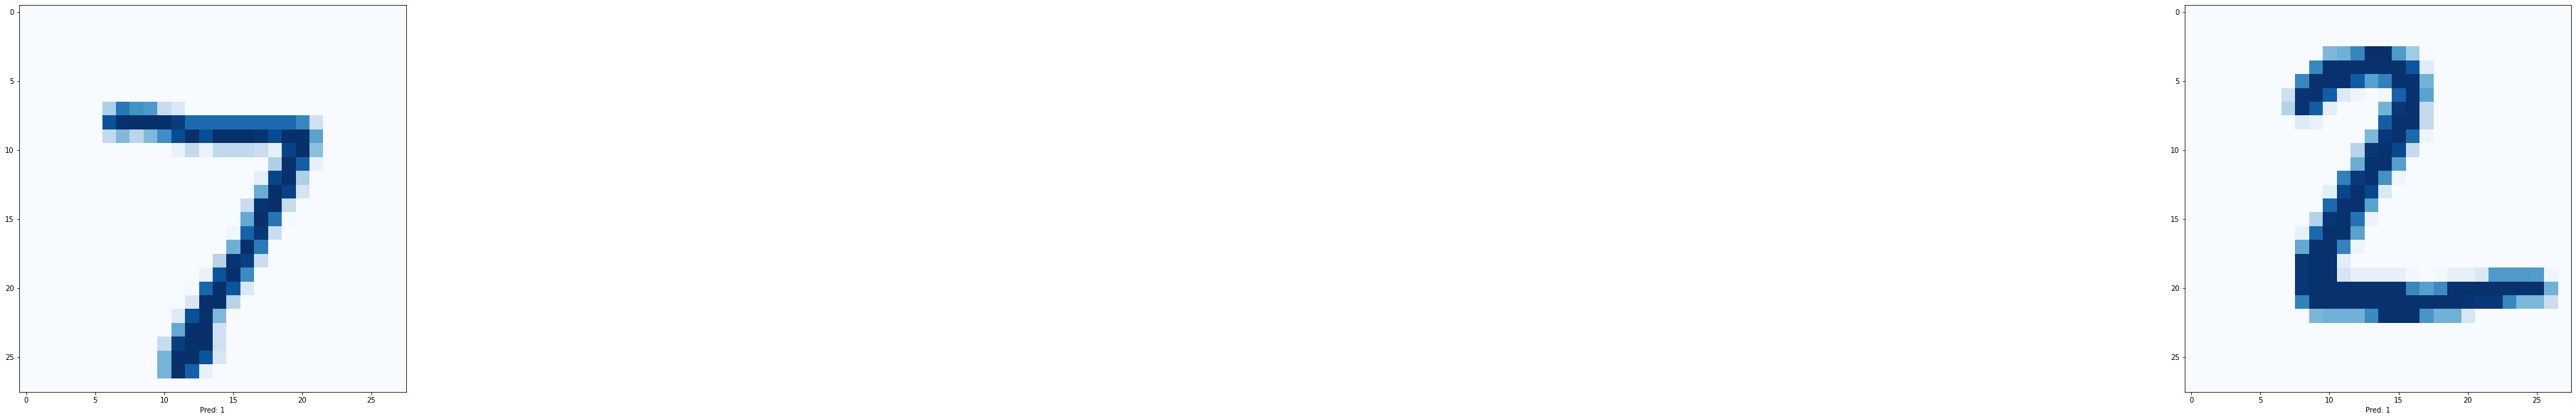

In [33]:
x = ml.predict(p_tt)
pred = np.argmax(x,axis=1)

fig, axis = plt.subplots(1,2,figsize=(100,10))

for i in range(0,2):
    axis[i].imshow(p_tt[i], cmap='Blues')
    
for i, bx in enumerate(axis.flat):
    bx.set(xlabel= "Pred: {}".format(pred[i]))

In [34]:
from sklearn.metrics import r2_score

au = r2_score(q_tt,pred)
print("r2 score: {:0.3f}%".format(au*100))

r2 score: -141.404%
